In [36]:
#The purpose of Bert is to genrate embedding vector for entire sentance

#BERT produces a vector of 768 because it has 12 transformer layers, each of which has 64 attention heads. 
#Each attention head has a 64-dimensional output vector, and the 12 attention heads are concatenated to form a 768-dimensional output vector.

#The 768-dimensional vector is a representation of the input text that captures the semantic and syntactic relationships between the words in the text. 
#This representation can be used for a variety of natural language processing tasks, such as text classification, sentiment analysis, and question answering

In [37]:
!pip install tensorflow_text
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [38]:
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [39]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [40]:
#we are using downsaampling for balancing rhe dataset
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [41]:
747/4825
#so, here we can see that 15% are spam email and 58% are ham email
#it is embelance data

0.15481865284974095

In [42]:
df_spam=df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [43]:
df_ham=df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [44]:
df_ham.sample(df_spam.shape[0])

,Category,Message
4141,ham,Leave it wif me lar... Ü wan to carry meh so h...
4552,ham,Great. Have a safe trip. Dont panic surrender ...
2780,ham,Well I might not come then...
4905,ham,"no, i *didn't* mean to post it. I wrote it, an..."
4405,ham,"Sorry, I'll call later &lt;#&gt; mins"
...,...,...
2169,ham,Thx. All will be well in a few months
1676,ham,"Painful words- ""I thought being Happy was the ..."
960,ham,Where @
4942,ham,Omg you can make a wedding chapel in frontierv...


In [45]:
#downshampling
df_ham_downshampled=df_ham.sample(df_spam.shape[0])#now both size will same
df_ham_downshampled.shape


(747, 2)

In [46]:
df_spam = df_spam.sample(frac=1)  # frac=1 means all rows will be randomly sampled
df_ham_downshampled = df_ham_downshampled.sample(frac=1)
df_balanced=pd.concat([df_spam,df_ham_downshampled])
df_balanced.shape
#we concatinating the both dataframe
#and now our dataset is balance

(1494, 2)

In [47]:
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [48]:
df_balanced.sample(5)

,Category,Message
401,spam,FREE RINGTONE text FIRST to 87131 for a poly o...
1699,spam,"Free msg. Sorry, a service you ordered from 81..."
3921,spam,FREE>Ringtone! Reply REAL or POLY eg REAL1 1. ...
607,spam,XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIAL...
611,spam,22 days to kick off! For Euro2004 U will be ke...


In [49]:
df_balanced['spam']=df_balanced['Category'].apply(lambda x: 1 if x=='spam' else 0  )
df_balanced.sample(10)

,Category,Message,spam
1975,ham,Thats cool. Where should i cum? On you or in y...,0
1712,ham,I got your back! Do you have any dislikes in bed?,0
2397,ham,Well you told others you'd marry them...,0
5473,ham,Ok lor ü reaching then message me.,0
4816,ham,Ü no home work to do meh...,0
1172,spam,Got what it takes 2 take part in the WRC Rally...,1
947,spam,Ur cash-balance is currently 500 pounds - to m...,1
3164,spam,This is the 2nd time we have tried to contact ...,1
1461,ham,Yalru lyfu astne chikku.. Bt innu mundhe lyf a...,0
645,ham,Allo! We have braved the buses and taken on th...,0


In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_balanced['Message'],df_balanced['spam'],stratify=df_balanced['spam'])

In [51]:
X_train.head()

4088    PRIVATE! Your 2003 Account Statement for 07973...
2568                         I dont want to hear anything
5191                               Sorry, I'll call later
4842    Hmmm.... Mayb can try e shoppin area one, but ...
4844                I need details about that online job.
Name: Message, dtype: object

In [52]:
X_test.head()

1407    URGENT, IMPORTANT INFORMATION FOR O2 USER. TOD...
114     GENT! We are trying to contact you. Last weeke...
1211            Guessin you ain't gonna be here before 9?
2480    Sppok up ur mob with a Halloween collection of...
4593    Right it wasnt you who phoned it was someone w...
Name: Message, dtype: object

In [53]:
preprocessor = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
encoder = hub.KerasLayer(
    "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [56]:
# get_sentance_embedding('Hey i've booked the pilates and yoga lesson al...')--->it should return 768 vector
def get_sentance_embedding(sentance):
  preprocessing_text=preprocessor(sentance)
  return encoder(preprocessing_text)['pooled_output']
get_sentance_embedding(["hello ronak is good boy",'meet is good boy'])
  

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.8320099 , -0.35873312, -0.5391771 , ..., -0.37063718,
        -0.6201322 ,  0.90075785],
       [-0.75311106, -0.26285863,  0.5885322 , ...,  0.42779535,
        -0.52751666,  0.81411105]], dtype=float32)>

In [57]:
e=get_sentance_embedding([
    'banana',
    'graphes',
    'mango',
    'jeff bezos',
    'elon musk',
    'bill gates'
])

In [58]:
e

<tf.Tensor: shape=(6, 768), dtype=float32, numpy=
array([[-0.7606916 , -0.14219397,  0.49604574, ...,  0.42165306,
        -0.5322139 ,  0.80312157],
       [-0.92705274, -0.39301613, -0.6399026 , ..., -0.49614468,
        -0.7006255 ,  0.89209855],
       [-0.7128858 , -0.15463883,  0.38401723, ...,  0.35278767,
        -0.50991315,  0.73474056],
       [-0.82533485, -0.35550627, -0.5906983 , ..., -0.01613823,
        -0.614176  ,  0.872303  ],
       [-0.75041324, -0.2681263 , -0.26689714, ...,  0.02839372,
        -0.59380966,  0.7974984 ],
       [-0.785443  , -0.29949623,  0.4102765 , ...,  0.52225506,
        -0.4957351 ,  0.81507415]], dtype=float32)>

In [62]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]])
#so we can see that banana and graphes are similar

array([[0.8239685]], dtype=float32)

In [68]:
# we are using functional model
#bert layer
text_input=tf.keras.layers.Input(shape=(),dtype=tf.string,name='text')
preprocessing_text=preprocessor(text_input)
outputs=encoder(preprocessing_text)

#Neural Network Layers
#we will use dropout layer
l=tf.keras.layers.Dropout(0.1,name='dropout')(outputs['pooled_output'])#it contain the 768 vector of sentance

l=tf.keras.layers.Dense(1,activation='sigmoid',name='output')(l)#it is functional model so we are giving inputs as l 
#construct a final model
model=tf.keras.Model(inputs=[text_input],outputs=[l])

In [69]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer_4 (KerasLayer)     {'input_word_ids':   0           ['text[0][0]']                   
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128),                                                      
                                 'input_mask': (Non                                               
                                e, 128)}                                                    

In [70]:
#here we can see that  769 is trainable parameter and 109489010 is non trainable parameter because it is already pretrained by bert

In [71]:
METRICS=[
    tf.keras.metrics.BinaryAccuracy(name='accuracy'),
    tf.keras.metrics.Precision(name='precision'),
    tf.keras.metrics.Recall(name='recall')
]
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=METRICS)

In [72]:
model.fit(X_train,y_train,epochs=10)

Epoch 1/10
35/35 [==============================] - 30s 356ms/step - loss: 0.6041 - accuracy: 0.6982 - precision: 0.7056 - recall: 0.6804
Epoch 2/10
35/35 [==============================] - 12s 347ms/step - loss: 0.5011 - accuracy: 0.8143 - precision: 0.7866 - recall: 0.8625
Epoch 3/10
35/35 [==============================] - 12s 339ms/step - loss: 0.4345 - accuracy: 0.8607 - precision: 0.8569 - recall: 0.8661
Epoch 4/10
35/35 [==============================] - 12s 342ms/step - loss: 0.3846 - accuracy: 0.8750 - precision: 0.8723 - recall: 0.8786
Epoch 5/10
35/35 [==============================] - 12s 343ms/step - loss: 0.3596 - accuracy: 0.8875 - precision: 0.8767 - recall: 0.9018
Epoch 6/10
35/35 [==============================] - 12s 349ms/step - loss: 0.3388 - accuracy: 0.8929 - precision: 0.8716 - recall: 0.9214
Epoch 7/10
35/35 [==============================] - 12s 354ms/step - loss: 0.3163 - accuracy: 0.8991 - precision: 0.8942 - recall: 0.9054
Epoch 8/10
35/35 [================

In [73]:
model.evaluate(X_test,y_test)

12/12 [==============================] - 6s 330ms/step - loss: 0.2790 - accuracy: 0.9198 - precision: 0.9067 - recall: 0.9358


[0.27904313802719116,
 0.9197860956192017,
 0.9067357778549194,
 0.9358288645744324]

In [74]:
y_predicted=model.predict(X_test)
y_predicted=y_predicted.flatten()

12/12 [==============================] - 5s 321ms/step


In [75]:
import numpy as np
y_predicted=np.where(y_predicted > 0.5,1,0)
y_predicted

array([1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,

In [76]:
from sklearn.metrics import confusion_matrix,classification_report

cm=confusion_matrix(y_test,y_predicted)
cm

array([[169,  18],
       [ 12, 175]])

Text(50.722222222222214, 0.5, 'Truth')

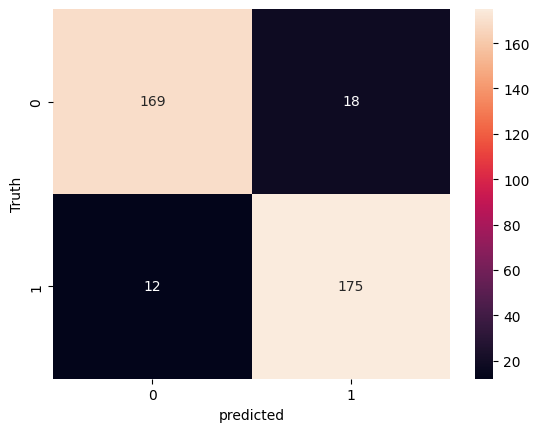

In [78]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm,annot=True,fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [81]:
print(classification_report(y_test,y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92       187
           1       0.91      0.94      0.92       187

    accuracy                           0.92       374
   macro avg       0.92      0.92      0.92       374
weighted avg       0.92      0.92      0.92       374



In [82]:
reviews=[
    'enter a chance to win $500000 hurry up, offer valid until march 31,2021',
    'hey meet are you coming for college today?'
]
model.predict(reviews)
#so it predicted right 0 is ham and 1 is spam so>0.5 will be ham 

1/1 [==============================] - 2s 2s/step


array([[0.8389796 ],
       [0.09264378]], dtype=float32)